In [9]:
from elec_bol20 import *
import elec_bol20.util as ebu

Crea la transformación de cartograma para el modelo de predicciones

## abrimos los datos

In [10]:
#abrimos los datos
data = ebu.open_concat_est_2019()
data

,PAIS,HAB,LAT,LON,DEN,N_MESAS,REC,MUN,BOL
ID_RECI,,,,,,,,,
1101192438426096,Argentina,864,-51.623048,-69.216829,1.382400,4,Pastoral de Rio Gallegos,Güer Aike,False
1101192438326095,Argentina,234,-47.745855,-65.887989,0.374400,1,Escuela N°56 Krewen Kau,Deseado,False
1101185407325303,Argentina,1796,-45.863231,-67.476142,2.873600,8,Centro Cultural de Comodoro Rivadavia,Comodoro Rivadavia,False
1101185437226084,Argentina,1270,-42.759077,-65.050415,2.032000,6,"Centro de Residentes Bolivianos \Wiñay\""""",Puerto Madryn,False
1101123376625091,Argentina,1095,-40.811909,-62.996204,1.752000,5,Universidad Nacional De Rio Negro,Viedma,False
...,...,...,...,...,...,...,...,...,...
1003207223402007,Bolivia,1369,-17.778898,-63.158033,3716.562895,7,Col. Club De Leones #10 (Máximo Diescher),Santa Cruz de La Sierra,True
1003203082100238,Bolivia,2227,-17.433300,-66.122000,2121.740097,10,Unidad Educativa Siglo XX - Gabriela Mistral,Cochabamba,True
1003208263400001,Bolivia,210,-14.975160,-64.637060,6.046563,1,Esc. Peroto,San Andrés,True


In [11]:
# añadmios un pequeño jitter a los recintos que lat lon repetidos
lalo = ['LAT', 'LON']
data.groupby(lalo)
n = data.groupby(lalo)['LAT'].count()
n.name = 'repete'
_d = data.reset_index().set_index(lalo)
_d['repete'] = n
_d = _d.reset_index().set_index('ID_RECI')
repete_ = _d['repete']>1
len_rep = len(_d[repete_])
_d.loc[repete_,'LAT'] = _d[repete_]['LAT'] +\
                                   (np.random.random(len_rep)-.5) * .05
_d.loc[repete_,'LON'] = _d[repete_]['LON'] + \
                                   (np.random.random(len_rep)-.5) * .05
data = _d

In [12]:
# visualicemos las lat y lon resultantes
bokeh.plotting.output_notebook()
p = bokeh.plotting.figure()
p.scatter(x=data['LON'],y=data['LAT'])
bokeh.plotting.show(p)

Loading BokehJS ...

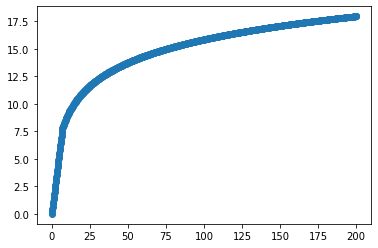

In [13]:
# aplicamos un transformacion lineal al radio para acercar a los recintos muy lejanos e.g. china 
st = matplotlib.scale.SymmetricalLogTransform(10,7,1).transform
l = np.linspace(0,200,1000)
plt.scatter(x=l,y=st(l))
plt.show()
x_med = (data['LON'] * data['HAB']).sum() / data['HAB'].sum()
y_med = (data['LAT'] * data['HAB']).sum() / data['HAB'].sum()
y = data['LAT'] - y_med
x = data['LON'] - x_med
r = (x**2 + y**2)**(1/2)
p = bokeh.plotting.figure()
rat = st(r)/r
xrat = x * rat
yrat = y * rat
p.scatter(x=xrat, y=yrat)
bokeh.plotting.show(p, browser='safari')
data['x0'] = xrat
data['y0'] = yrat

## Primera pasada de cart

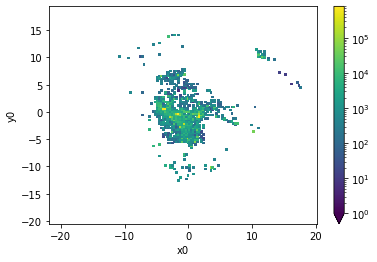

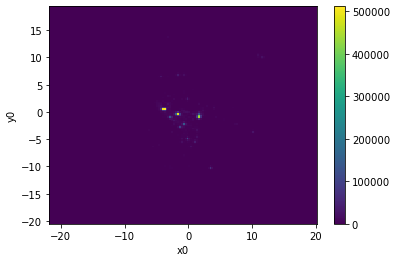

    2%  |=                                                 |
    9%  |====                                              |
   14%  |=======                                           |
   20%  |==========                                        |
   25%  |============                                      |
   30%  |===============                                   |
   34%  |=================                                 |
   38%  |===================                               |
   41%  |====================                              |
   45%  |======================                            |
   48%  |========================                          |
   51%  |=========================                         |
   54%  |===========================                       |
   57%  |============================                      |
   60%  |==============================                    |
   63%  |===============================                   |
   67%  |===============

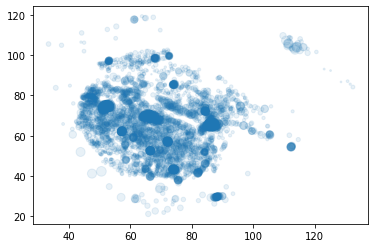

In [14]:
N = ebu.HAB
x0, y0 = 'x0', 'y0'
x1, y1 = 'x1', 'y1'
_r = .3
sigma_gauss = .5
data0 = data.copy()
x_range = 21
y_range = 20
fun = lambda ds: ds**(1/2)+25

ndf = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

## segunda padada cart

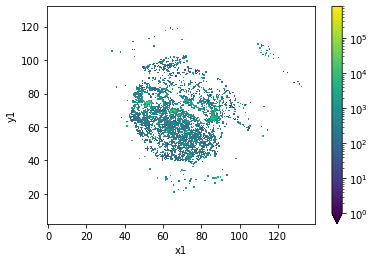

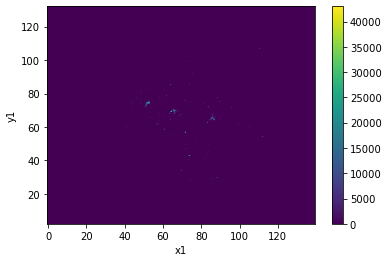

    2%  |=                                                 |
    9%  |====                                              |
   14%  |=======                                           |
   20%  |==========                                        |
   23%  |===========                                       |
   27%  |=============                                     |
   30%  |===============                                   |
   33%  |================                                  |
   35%  |=================                                 |
   38%  |===================                               |
   41%  |====================                              |
   43%  |=====================                             |
   46%  |=======================                           |
   49%  |========================                          |
   52%  |==========================                        |
   54%  |===========================                       |
   57%  |===============

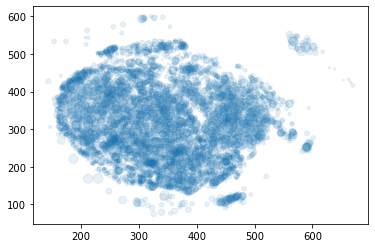

In [15]:
x0, y0 = 'x1', 'y1'
x1, y1 = 'x2', 'y2'
_r = .2
sigma_gauss = .4
data0 = ndf.copy()
x_range =70
y_range = 65
fun = lambda ds: ds+100

ndf1 = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun
)

## tercera pasada

acá aplicamos la tercera pasada
la cual nos da una buena separación de mesas aledañas. 

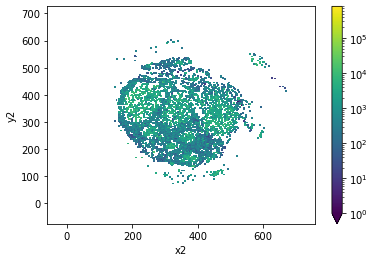

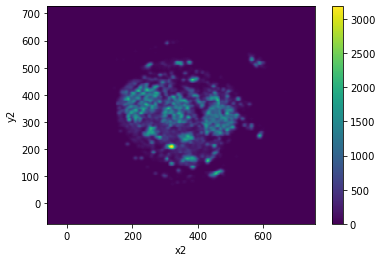

    2%  |=                                                 |
    9%  |====                                              |
   14%  |=======                                           |
   20%  |==========                                        |
   25%  |============                                      |
   31%  |===============                                   |
   35%  |=================                                 |
   39%  |===================                               |
   42%  |=====================                             |
   46%  |=======================                           |
   49%  |========================                          |
   52%  |==========================                        |
   55%  |===========================                       |
   58%  |=============================                     |
   61%  |==============================                    |
   63%  |===============================                   |
   66%  |===============

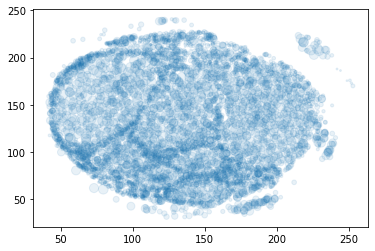

In [16]:
#code
x0, y0 = 'x2', 'y2'
x1, y1 = 'x3', 'y3'
_r = 3
sigma_gauss = 1.5
data0 = ndf1.copy()
x_range = 410
y_range = 400
fun = lambda ds: ds+300

ndf2 = ebu.get_carto_df(
    N, _r, data0, sigma_gauss,
    x0, x1, x_range,
    y0, y1, y_range,
    fun, rad = 15
)

## empujemos al exterior para que no se mexcle con el pais

In [17]:
# empujamos los datos que no son bolivia para que la división sea clara
x_med = (ndf2['x3'] * ndf2['HAB']).sum() / ndf2['HAB'].sum()
y_med = (ndf2['y3'] * ndf2['HAB']).sum() / ndf2['HAB'].sum()

ndf2['rat'] = 1
ndf2.loc[~ndf2['BOL'],'rat'] = 1.5

x = ndf2['x3'] - x_med
y = ndf2['y3'] - y_med
r = (x**2 + y**2)**(1/2)
p = bokeh.plotting.figure()
rat = ndf2['rat']
xrat = x * rat
yrat = y * rat
p.scatter(x=xrat, y=yrat)
bokeh.plotting.show(p, browser='safari')
ndf2['x4'] = xrat
ndf2['y4'] = yrat

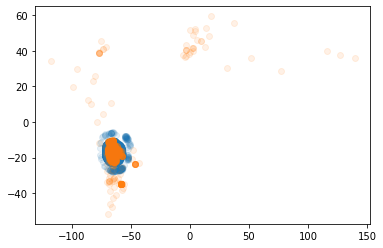

In [24]:
ndf3 = ebu.rescale_xy(ndf2, x0='LON', y0='LAT', x3='x4', y3='y4', X='X', Y='Y',
                     fx=1/2,fy=.6
                     )
plt.scatter(ndf3['X'],ndf3['Y'],alpha=.1)
plt.scatter(ndf3['LON'],ndf3['LAT'],alpha=.1)
plt.show()

## guardamos los datos

In [25]:
dfout:pd.DataFrame = ndf3[['X','Y']]

In [26]:
# save the file
dfout.index.name='ID_RECI'
dfout.reset_index().to_csv(
    ebu.CSV_CART_2019,
    index=False
)